#### In this lab we tried to build an image classifier from the car dataset using CNN
#### This dataset consists of image of cars from (https://unsplash.com/) which consists of 80 images of cars and 80 images of not cars
#### The dataset is divided in 100 images of training set  (50 object/50 not object), a validation set of 30 images (15 object/15 not object), and a test set of 30 images(15 object/15 not object).

#### If we tried to build a model using convolutional neural network for image classification and tried to predict how the model performed.
#### The base model was able to give us an accuracy of 73 % on the testing data, so in the next step we treid to augument the data.

#### We build two augumented models, one with normal augumnted data and then by adding hyperparameters to it.
#### The first of the model was able to give us an accuracy of 69% which is comparitively less than what we got in base model. The main purpose of augumenting was to get better accuracy, so we tuned the data using hyper paramters, The accuray obtained was 80%  which means the model was able to classify the image 80% of the time which is   very good result. 

#### Our work is given below


### Code

In [32]:
import tensorflow as tf   #importing tensorflow libraries
import matplotlib.pyplot as plt  #importing matplotlib to plotting graphs
from tensorflow import keras   #importing keras for neural network
import cv2
import os
import numpy as np
import pandas as pd

from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
   
from keras.preprocessing.image import ImageDataGenerator  #importing ImageDataGnenerator library, this library is utilized to generate labels for our images 
from keras.models import Sequential  # To create a plain stack of layers where each layer has one input tensor and one output tensor
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense,BatchNormalization


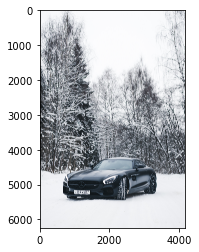

In [3]:
plt.imshow(image.load_img('C:/Users/Abhay/Lab-3/Train/Cars/1.jpg'))  #loading the image

### Generate training, validation, testing dataset

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255)       #initiate class for training 
validation_datagen = ImageDataGenerator(rescale=1./255)  #initiate class for validation
test_datagen = ImageDataGenerator(rescale=1./255)  #initiate class for testing
# this is a generator that will read pictures found in
# subfolders of 'data/train', and indefinitely generate
# batches of augmented image data
train_data = train_datagen.flow_from_directory(
        'C:/Users/Abhay/Lab-3/Train',  # this is the input directory
        target_size=(148, 148),  # all images will be resized to 148x148 . Since we cannot give multiple size images to neural network, we resize the images
        batch_size=2,           # the neural network will train up in batches of 2
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data, with images being resized to 148x148,trained in batches of 2 with binary labels.
validation_data = validation_datagen.flow_from_directory(
        'C:/Users/Abhay/Lab-3/Validation',
        target_size=(148, 148),
        batch_size=1,
        class_mode='binary')
# this is a similar generator, for test data, with images being resized to 148x148,trained in batches of 2 with binary labels.
test_data = test_datagen.flow_from_directory(
        'C:/Users/Abhay/Lab-3/Test',
        target_size=(148, 148),
        batch_size=1,
        class_mode='binary')

Found 100 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


### Using original data

In [5]:
# Building the model using Conv2D, activation, maxpooling, droupout etc

INPUT_SHAPE = (148, 148, 3)   #change or resizing the image to 148x148, 3 is RGB three colors

model_origninal = Sequential()    # Establishing networks as sequential
model_origninal.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))  #add convolution layer with 32 filters 
model_origninal.add(Activation('relu'))  # add activation function as relu
model_origninal.add(MaxPooling2D(pool_size=(2, 2))) # adding maxpooling layer which takes max pixel in given no of pixel

model_origninal.add(Conv2D(32, (3, 3))) #add convolution layer with 32 filters 
model_origninal.add(Activation('relu')) # add activation function as relu 
model_origninal.add(MaxPooling2D(pool_size=(2, 2))) # adding maxpooling layer which takes max pixel in given no of pixel

# defining another convoluton layer with 64 filter
model_origninal.add(Conv2D(64, (3, 3)))
model_origninal.add(Activation('relu'))  # add activation function as relu
model_origninal.add(MaxPooling2D(pool_size=(2, 2))) # adding maxpooling layer which takes max pixel in given no of pixel

model_origninal.add(Flatten()) 
model_origninal.add(Dense(64))  # Adding dense layer, increasing density of layer
model_origninal.add(Activation('relu')) #Addding activation function relu
model_origninal.add(Dropout(0.5)) #Ading droupout of 0.5 to prevent overfitting
model_origninal.add(Dense(1)) # Adding second dense layer
model_origninal.add(Activation('sigmoid')) #Addding activation function sigmoid since we have binary values

#compile the model 
model_origninal.compile(loss='binary_crossentropy',  #since this is classification we keep loss as binary_crossentropy
              optimizer='rmsprop',          #optimizer used is rmsprop, which is used to reduce the loss
              metrics=['accuracy'])      #metrics we need to optimize which is accuracy 

print(model_origninal.summary())     # print the summary of the model with the list of layers added, the shape  and the parameters.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 146, 146, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 146, 146, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 71, 71, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)       

In [6]:
#Fitting the model, 
#Here we pass the training dataset, we keep epochs of 15 and also provide validation data.
history_origninal=model_origninal.fit_generator(
        train_data,
        epochs=15,
        validation_data=validation_data,
        )

Epoch 1/15
50/50 [==============================] - 57s 1s/step - loss: 0.7753 - accuracy: 0.4300 - val_loss: 0.7358 - val_accuracy: 0.5000
Epoch 2/15
50/50 [==============================] - 47s 939ms/step - loss: 0.7075 - accuracy: 0.4500 - val_loss: 0.6984 - val_accuracy: 0.5000
Epoch 3/15
50/50 [==============================] - 49s 985ms/step - loss: 0.7199 - accuracy: 0.6100 - val_loss: 0.8423 - val_accuracy: 0.5000
Epoch 4/15
50/50 [==============================] - 52s 1s/step - loss: 0.7252 - accuracy: 0.5500 - val_loss: 0.7131 - val_accuracy: 0.5000
Epoch 5/15
50/50 [==============================] - 52s 1s/step - loss: 0.7226 - accuracy: 0.5200 - val_loss: 0.5887 - val_accuracy: 0.7333
Epoch 6/15
50/50 [==============================] - 53s 1s/step - loss: 0.6962 - accuracy: 0.6300 - val_loss: 0.7491 - val_accuracy: 0.6000
Epoch 7/15
50/50 [==============================] - 49s 987ms/step - loss: 0.7037 - accuracy: 0.6300 - val_loss: 0.7817 - val_accuracy: 0.8333
Epoch 8/15


### Here we were able to get a accuracy of 76 % on validation data and with a validation loss of just 0.03 which is very good result.

Text(0.5, 1.0, 'Accuracy evolution')

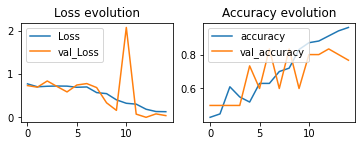

In [7]:
#Plotting loss function with training set and validaton set
plt.subplot(2, 2, 1) # First plot of the two plots
plt.plot(history_origninal.history['loss'], label='Loss') # First input variable for line graph(loss)
plt.plot(history_origninal.history['val_loss'], label='val_Loss') # second input variable for line graph(val_loss)
plt.legend()
plt.title('Loss evolution')


#Plotting accuracy with training and validation set
plt.subplot(2, 2, 2) 
plt.plot(history_origninal.history['accuracy'], label='accuracy') # First input variable for line graph(accuracy)
plt.plot(history_origninal.history['val_accuracy'], label='val_accuracy') # second input variable for line graph(val_accuracy)
plt.legend()
plt.title('Accuracy evolution')

### The graph shows that the loss and accuracy evolution for both training and validation dataset. The loss graph shows the values have been same for most of the epoch except 1, while accuracy kept on flucuating.

In [12]:
#Now we try to find the accuracy with test dataset 
evaluation = model_origninal.evaluate(test_data) # Creating the evalutaion variable for x_test and y_test_cat
print('Test Accuracy: {}'.format(evaluation[1])) 


30/30 [==============================] - 14s 470ms/step
Test Accuracy: 0.7333333492279053


### We were able to get a accuracy of 73% which is decent but there is  a scope for improvement. So on the next model we try to augument the data.

### Using Data Augmentation

### Augmentation#1

In [20]:
#create instance of image data generator class and passing augumentation parameters
train_datagen = ImageDataGenerator(        
        rescale=1./255,
        rotation_range=45,       #Random rotation between 0 to 45
        shear_range=0.2,        #shear range used to create or rectify the perception angles
        zoom_range=0.2,          #Zoom in, zoom ot by 20% 
        horizontal_flip=True)    # this does a mirror reflection
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# this is the augmentation configuration we will use for validation:
# only rescaling. But you can try other operations


# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_data = train_datagen.flow_from_directory(
        'C:/Users/Abhay/Lab-3/Train',  # this is the input directory
        target_size=(148, 148),  # all images will be resized to 148x148
        batch_size=2,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_data = validation_datagen.flow_from_directory(
        'C:/Users/Abhay/Lab-3/Validation',
        target_size=(148, 148),
        batch_size=1,
        class_mode='binary')

test_data = test_datagen.flow_from_directory(
        'C:/Users/Abhay/Lab-3/Test',
        target_size=(148, 148),
        batch_size=1,
        class_mode='binary')

Found 100 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [21]:

###2 conv and pool layers. with some normalization and drops in between.

INPUT_SHAPE = (148, 148, 3)   

model_aug = Sequential() # Establishing networks as sequential
model_aug.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE)) #add convolution layer with 32 filters 
model_aug.add(Activation('relu')) 
model_aug.add(MaxPooling2D(pool_size=(2, 2)))

model_aug.add(Conv2D(32, (3, 3))) #add convolution layer with 32 filters
model_aug.add(Activation('relu')) # add activation function as relu 
model_aug.add(MaxPooling2D(pool_size=(2, 2)))

model_aug.add(Conv2D(64, (3, 3))) #add convolution layer with 64 filters
model_aug.add(Activation('relu')) # add activation function as relu
model_aug.add(MaxPooling2D(pool_size=(2, 2)))

model_aug.add(Flatten())
model_aug.add(Dense(64)) #add dense layer with 64 nodes
model_aug.add(Activation('relu')) # add activation function as relu
model_aug.add(Dropout(0.5))
model_aug.add(Dense(1)) #add dense layer with 1 node
model_aug.add(Activation('sigmoid')) # add activation function as sigmoid as it is better suited for binary outcomes

model_aug.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model_aug.summary())    

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 146, 146, 32)      896       
_________________________________________________________________
activation_11 (Activation)   (None, 146, 146, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 71, 71, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 71, 71, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 33, 33, 64)       

In [22]:
history_aug=model_aug.fit_generator(
        train_data,
        epochs=15,
        validation_data=validation_data,
        )

Epoch 1/15
50/50 [==============================] - 57s 1s/step - loss: 1.0145 - accuracy: 0.5300 - val_loss: 0.7023 - val_accuracy: 0.5000
Epoch 2/15
50/50 [==============================] - 49s 978ms/step - loss: 0.7133 - accuracy: 0.5000 - val_loss: 0.7103 - val_accuracy: 0.5000
Epoch 3/15
50/50 [==============================] - 50s 994ms/step - loss: 0.7047 - accuracy: 0.4600 - val_loss: 0.6894 - val_accuracy: 0.7667
Epoch 4/15
50/50 [==============================] - 48s 963ms/step - loss: 0.7291 - accuracy: 0.5100 - val_loss: 0.6536 - val_accuracy: 0.5000
Epoch 5/15
50/50 [==============================] - 48s 966ms/step - loss: 0.7144 - accuracy: 0.5300 - val_loss: 0.7121 - val_accuracy: 0.7000
Epoch 6/15
50/50 [==============================] - 45s 898ms/step - loss: 0.7310 - accuracy: 0.6300 - val_loss: 0.1086 - val_accuracy: 0.5333
Epoch 7/15
50/50 [==============================] - 48s 967ms/step - loss: 0.7285 - accuracy: 0.5800 - val_loss: 0.8959 - val_accuracy: 0.5667
Ep

### After performing data augumentation we the validation accuracy has increased from 76 % to 83 % although we were the validation loss is was also increased which is not a good sign, So in the next step we try to tune the model with differnet hyperparameters.

In [31]:
evaluation = model_aug.evaluate(test_data) # Creating the evalutaion variable for x_test and y_test_cat
print('Test Accuracy: {}'.format(evaluation[1])) 


30/30 [==============================] - 14s 476ms/step
Test Accuracy: 0.699999988079071


### Also the test accuracy we got using data augmentation is 69% which is less than previous model. Our main purpose of data augumenatation was to improve the accuracy so we need to tune the model in the next part.

### Augmented model #2 using hyperparameters.

In [1]:

###2 conv and pool layers. with some normalization and drops in between.

INPUT_SHAPE = (148, 148, 3)   #change to (SIZE, SIZE, 3)

model_aug_2 = Sequential() # Establishing networks as sequential
model_aug_2.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE)) #add convolution layer with 32 filters 
model_aug_2.add(Activation('relu'))
model_aug_2.add(BatchNormalization())
model_aug_2.add(MaxPooling2D(pool_size=(2, 2)))
model_aug_2.add(Dropout(0.4))

model_aug_2.add(Conv2D(64, (3, 3)))
model_aug_2.add(Activation('relu'))
model_aug_2.add(BatchNormalization())
model_aug_2.add(MaxPooling2D(pool_size=(2, 2)))
model_aug_2.add(Dropout(0.4))

model_aug_2.add(Conv2D(128, (3, 3)))
model_aug_2.add(Activation('relu'))
model_aug_2.add(BatchNormalization())
model_aug_2.add(MaxPooling2D(pool_size=(2, 2)))
model_aug_2.add(Dropout(0.4))

model_aug_2.add(Flatten())
model_aug_2.add(Dense(128))
model_aug_2.add(Activation('relu'))
model_aug_2.add(BatchNormalization())
model_aug_2.add(Dropout(0.5))
model_aug_2.add(Dense(1))
model_aug_2.add(Activation('sigmoid'))

model_aug_2.compile(loss='binary_crossentropy',
              optimizer='rmsprop', #
              metrics=['accuracy'])

print(model_aug_2.summary())    

NameError: name 'Sequential' is not defined

In [34]:
history_aug_2=model_aug_2.fit_generator(
        train_data,
        epochs=15,
        validation_data=validation_data,
        )

Epoch 1/15
50/50 [==============================] - 44s 873ms/step - loss: 0.6163 - accuracy: 0.7600 - val_loss: 0.6514 - val_accuracy: 0.8667
Epoch 2/15
50/50 [==============================] - 38s 767ms/step - loss: 0.6340 - accuracy: 0.7100 - val_loss: 0.5080 - val_accuracy: 0.7667
Epoch 3/15
50/50 [==============================] - 40s 790ms/step - loss: 0.5532 - accuracy: 0.7300 - val_loss: 0.5795 - val_accuracy: 0.8667
Epoch 4/15
50/50 [==============================] - 38s 764ms/step - loss: 0.6289 - accuracy: 0.7000 - val_loss: 0.4846 - val_accuracy: 0.8667
Epoch 5/15
50/50 [==============================] - 39s 774ms/step - loss: 0.6086 - accuracy: 0.7100 - val_loss: 0.6631 - val_accuracy: 0.9000
Epoch 6/15
50/50 [==============================] - 39s 774ms/step - loss: 0.6048 - accuracy: 0.7000 - val_loss: 0.2980 - val_accuracy: 0.8667
Epoch 7/15
50/50 [==============================] - 38s 764ms/step - loss: 0.5190 - accuracy: 0.7300 - val_loss: 0.5686 - val_accuracy: 0.8667

### With this model where we did data augumentation and tuned the model with hyperparameters we wre able to get best validation accuracy among all the models with 86 % accuracy and validation loss of only 0.002%

Text(0.5, 1.0, 'Accuracy evolution')

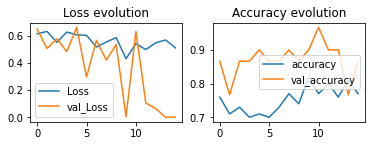

In [35]:
#Plotting loss function with training set and validaton set
plt.subplot(2, 2, 1) # First plot of the two plots
plt.plot(history_aug_2.history['loss'], label='Loss') # First input variable for line graph(loss)
plt.plot(history_aug_2.history['val_loss'], label='val_Loss') # second input variable for line graph(val_loss)
plt.legend()
plt.title('Loss evolution')


#Plotting accuracy with training and validation set
plt.subplot(2, 2, 2) 
plt.plot(history_aug_2.history['accuracy'], label='accuracy') # First input variable for line graph(accuracy)
plt.plot(history_aug_2.history['val_accuracy'], label='val_accuracy') # second input variable for line graph(val_accuracy)
plt.legend()
plt.title('Accuracy evolution')

In [36]:
evaluation = model_aug_2.evaluate(test_data) # Creating the evalutaion variable for x_test and y_test_cat
print('Test Accuracy: {}'.format(evaluation[1])) 


30/30 [==============================] - 11s 383ms/step
Test Accuracy: 0.800000011920929


### Now we try to get the accuracy with test data and we were able to get an accuracy of 80% which tells us that the model is fitting really well.